In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('movies.csv')
df.head()

,name,certificate,genre,year,released,rating,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.shape

(7668, 15)

In [5]:
# find missing values
df.isnull().sum()

,0
name,0
certificate,77
genre,0
year,0
released,2
rating,3
votes,3
director,0
writer,3
star,1


In [6]:
# fill numeric missing values by the mean
df['budget'].fillna(df['budget'].mean(), inplace=True)
df['gross'].fillna(df['gross'].mean(), inplace=True)
df['runtime'].fillna(df['runtime'].mean(), inplace=True)

<ipython-input-6-7c25e33bacb6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['budget'].fillna(df['budget'].mean(), inplace=True)
<ipython-input-6-7c25e33bacb6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [7]:
# the rest are not numeric, they will be removed
df.dropna(inplace=True)

In [8]:
# find missing values
df.isnull().sum()

,0
name,0
certificate,0
genre,0
year,0
released,0
rating,0
votes,0
director,0
writer,0
star,0


In [9]:
# remove duplicates if exsist
df.duplicated().sum()

0

# Exploring the dataset

## 1. Genre Distribution with a Pie Chart
 ### The pie chart shows the distribution of movie genres, with **Comedy** (29.4%), **Action** (22.4%), and **Drama** (19.5%) being the most dominant genres in the dataset. Other genres, such as **Crime** (7.2%), **Biography**, and **Animation**, make up smaller portions, while less common genres are grouped into the "Other" category (5.7%). This highlights the popularity of lighthearted and action-packed content among audiences.

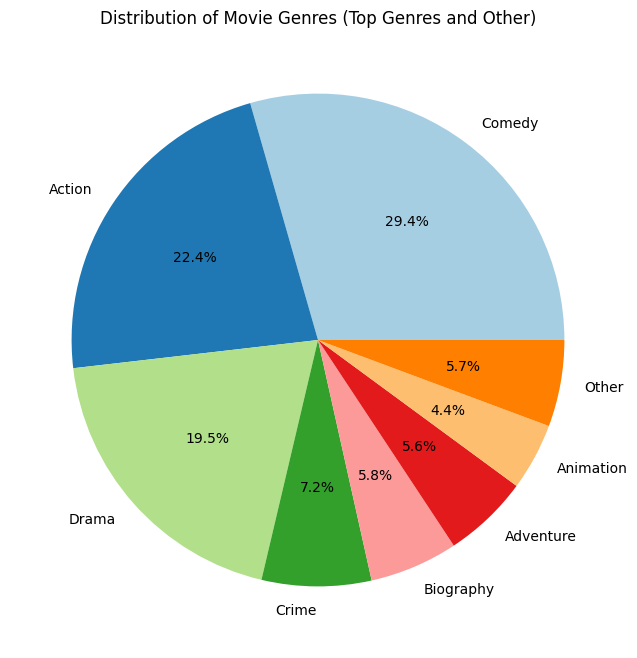

In [10]:
# Calculate genre distribution
genre_counts = df['genre'].str.split(',').explode().value_counts()

# Select top 7 genres, with the rest combined into "Other"
top_genres = genre_counts[:7]
other_genres_sum = genre_counts[7:].sum()
genre_counts_limited = pd.concat([top_genres, pd.Series({'Other': other_genres_sum})])


# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax = genre_counts_limited.plot.pie(
    autopct='%1.1f%%',
    colors=plt.cm.Paired.colors[:len(genre_counts_limited)],  # Limit colors
    title='Distribution of Movie Genres (Top Genres and Other)'
)
ax.set_ylabel('')  # Remove y-label
plt.show()

#2. Rating Distribution with a KDE Plot
### This density plot shows the distribution of movie ratings, with most movies clustered between **6 and 8**, indicating that the majority of films are rated in the above-average range. There are fewer movies with ratings below 4 or above 9, highlighting the rarity of extremely poor or exceptional ratings.

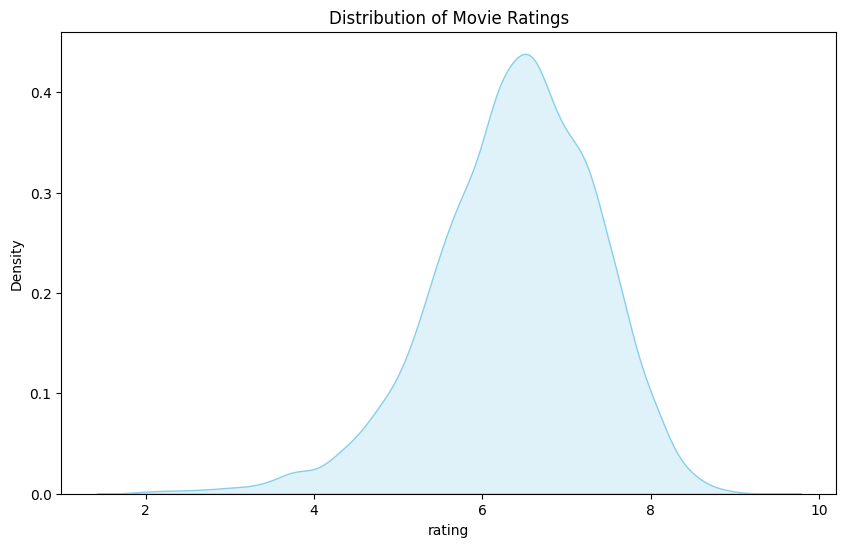

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.kdeplot(df['rating'], fill=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('rating')
plt.ylabel('Density')
plt.show()

#3. Top Directors with Most Movies in a Donut Chart
### This donut chart highlights the contribution of prominent directors to the dataset. **Woody Allen** leads with 26.2%, followed by **Clint Eastwood** at 21.4%, and **Steven Spielberg** at 18.6%. Directors like **Ron Howard** and others contribute smaller but significant portions, showcasing their influence in the film industry.

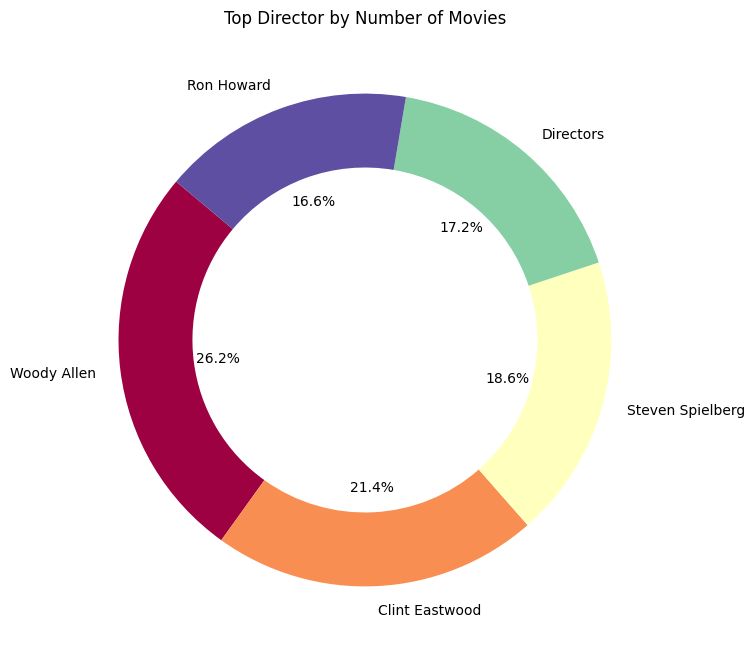

In [12]:
top_directors = df['director'].value_counts().head(5)

num_colors = len(top_directors)
colors = plt.cm.Spectral(np.linspace(0, 1, num_colors))

ax = top_directors.plot.pie(
    autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3),
    colors=colors, title='Top Director by Number of Movies', figsize=(8, 8)
)
ax.set_ylabel('')  # Hide y-label for donut chart
plt.show()

## 4. Top 5 certificates
### The bar chart displays the top 5 movie certificates, with **R** (Restricted) being the most common, followed by **PG-13** and **PG**, indicating that a significant portion of films are geared toward mature and teenage audiences. **Not Rated** and **G** (General Audience) certificates have much lower frequencies, reflecting a smaller number of family-friendly and unrated movies in the dataset.

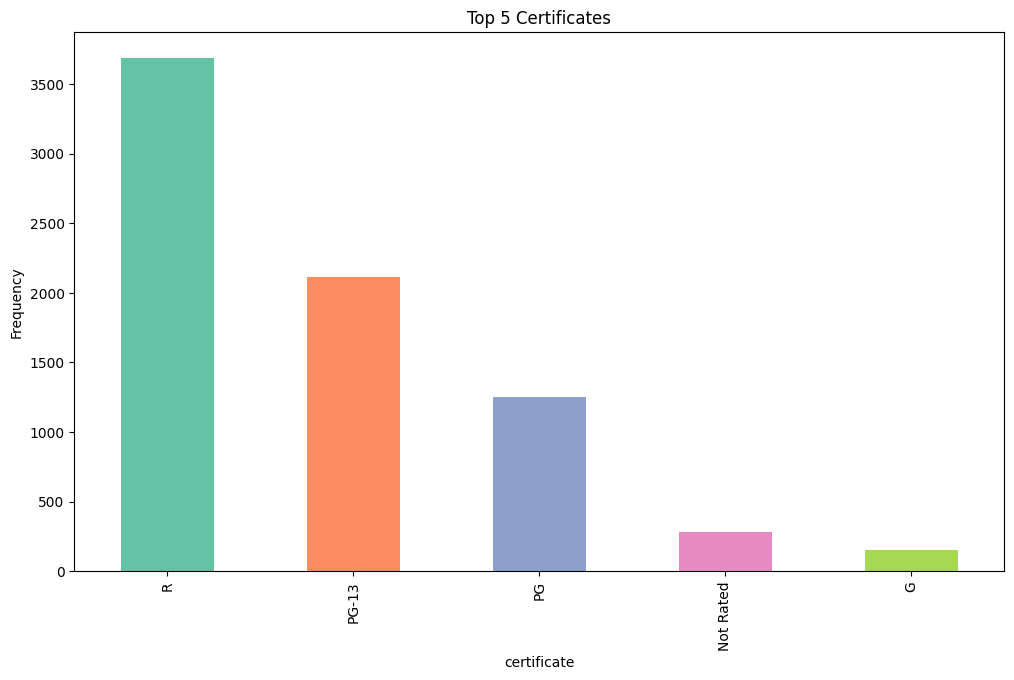

In [13]:
plt.figure(figsize=(12,7))
df.groupby('certificate').size().sort_values(ascending=False).head(5).plot(kind = 'bar', color = sns.color_palette('Set2'))
plt.xlabel('certificate')
plt.ylabel('Frequency')
plt.title("Top 5 Certificates")
plt.show()

## 5. Runtime vs. rating:
### The scatter plot with a trend line indicates a positive correlation between runtime and rating, suggesting that longer movies tend to receive higher ratings, potentially due to their ability to provide more in-depth storytelling and character development.

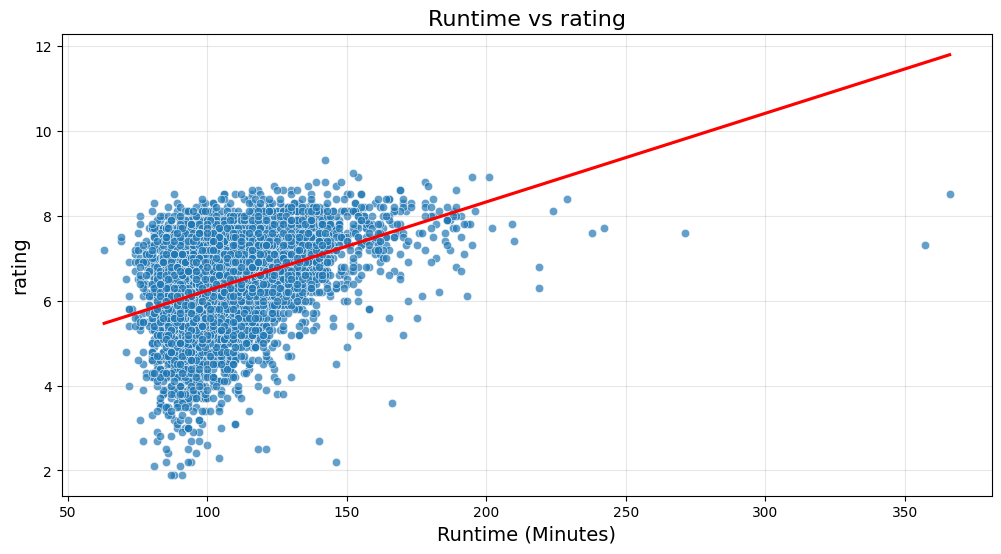

In [14]:
# Scatter plot for Runtime vs Gross Revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='runtime', y='rating', data=df, alpha=0.7)
sns.regplot(x='runtime', y='rating', data=df, scatter=False, color='red', ci=None)
plt.title('Runtime vs rating', fontsize=16)
plt.xlabel('Runtime (Minutes)', fontsize=14)
plt.ylabel('rating', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


# part 3, Finding Insights

## 1. Budget vs. Gross Revenue:

### The scatter plot with a trend line indicates a positive correlation between budget and gross revenue, suggesting that higher-budget movies tend to generate more revenue.

## 2. Genre vs. Average Gross Revenue:

### The bar chart shows that Animation, Family, and Action genres generate the highest average gross revenue, indicating their strong commercial appeal, while genres like Western, Musical, and Sport perform significantly lower in terms of revenue.

<ipython-input-15-3fe5305f1d7b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_gross_per_genre.index, y=avg_gross_per_genre.values, palette='viridis', ax=axes[1])


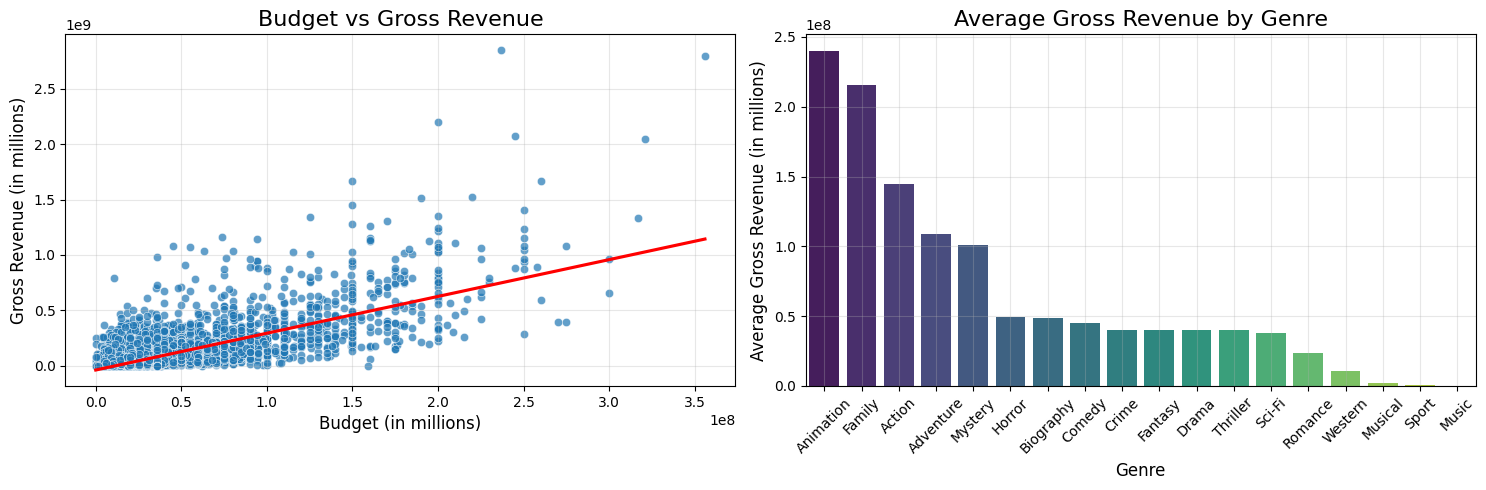

In [15]:
# Create a subplot grid for facets
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Chart 1: Scatter plot for Budget vs Gross Revenue
sns.scatterplot(x='budget', y='gross', data=df, alpha=0.7, ax=axes[0])
sns.regplot(x='budget', y='gross', data=df, scatter=False, color='red', ci=None, ax=axes[0])
axes[0].set_title('Budget vs Gross Revenue', fontsize=16)
axes[0].set_xlabel('Budget (in millions)', fontsize=12)
axes[0].set_ylabel('Gross Revenue (in millions)', fontsize=12)
axes[0].grid(alpha=0.3)

# Chart 2: Bar plot for Average Gross Revenue by Genre
avg_gross_per_genre = df.groupby('genre')['gross'].mean().sort_values(ascending=False)
sns.barplot(x=avg_gross_per_genre.index, y=avg_gross_per_genre.values, palette='viridis', ax=axes[1])
axes[1].set_title('Average Gross Revenue by Genre', fontsize=16)
axes[1].set_xlabel('Genre', fontsize=12)
axes[1].set_ylabel('Average Gross Revenue (in millions)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 3. Director Influence:

### The bar chart shows directors whose involvement contributes to financial success, Anthony Russo leads as the top director by average gross revenue, followed by Kyle Balda and Josh Cooley, indicating their significant contribution to high-revenue films, especially in blockbuster genres like animation and action.

## 4. Star Impact:
 ### The bar chart shows that Donald Glover and Daisy Ridley are the top stars in terms of average gross revenue, highlighting their significant contributions to high-grossing films, likely due to their involvement in blockbuster franchises.

<ipython-input-16-6c4e56da8ee5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm', ax=axes[0])
<ipython-input-16-6c4e56da8ee5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stars.values, y=top_stars.index, palette='magma', ax=axes[1])


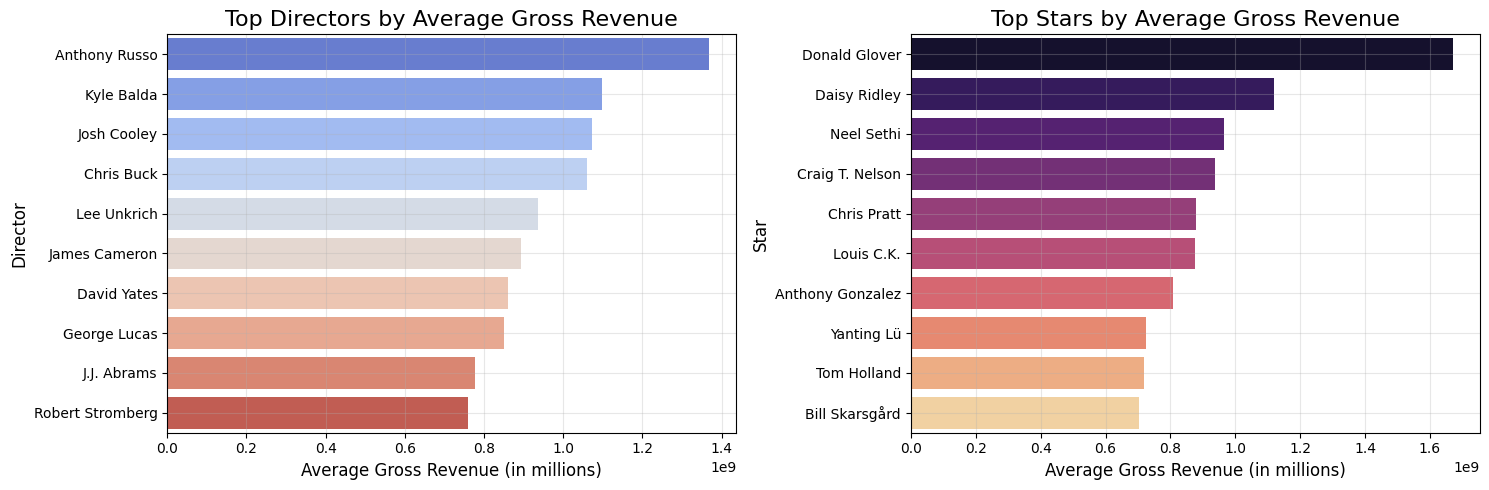

In [16]:
# Create a subplot grid for facets
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Chart 1: Top Directors by Average Gross Revenue
top_directors = df.groupby('director')['gross'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm', ax=axes[0])
axes[0].set_title('Top Directors by Average Gross Revenue', fontsize=16)
axes[0].set_xlabel('Average Gross Revenue (in millions)', fontsize=12)
axes[0].set_ylabel('Director', fontsize=12)
axes[0].grid(alpha=0.3)

# Chart 2: Top Stars by Average Gross Revenue
top_stars = df.groupby('star')['gross'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_stars.values, y=top_stars.index, palette='magma', ax=axes[1])
axes[1].set_title('Top Stars by Average Gross Revenue', fontsize=16)
axes[1].set_xlabel('Average Gross Revenue (in millions)', fontsize=12)
axes[1].set_ylabel('Star', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


#5. Gener & certificates

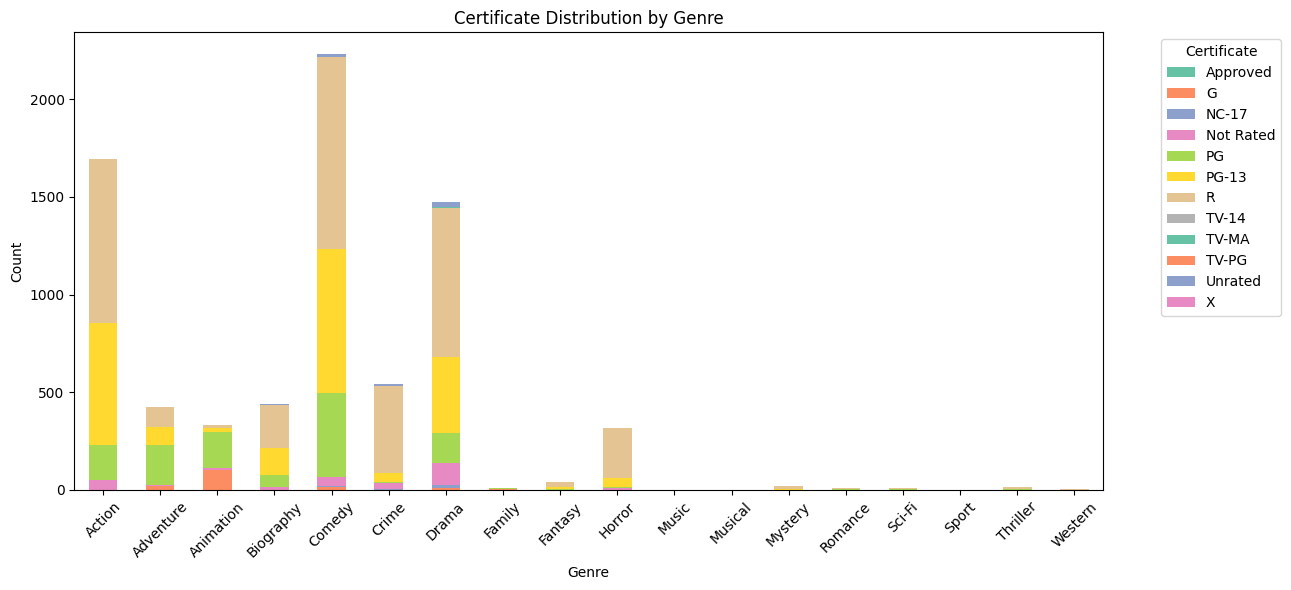

In [19]:
# Pivot the data to get counts of certificates for each genre
genre_certificates = df.groupby(['genre', 'certificate']).size().unstack(fill_value=0)

# Plot stacked bar chart
genre_certificates.plot(kind='bar', stacked=True, figsize=(13, 6), color=sns.color_palette("Set2", len(genre_certificates.columns)))
plt.title("Certificate Distribution by Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Certificate", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
# https://www.kaggle.com/datasets/danielgrijalvas/movies?resource=download